<a href="https://colab.research.google.com/github/RoaaM/movie_review/blob/main/Movie_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A movie review dataset.

In [2]:
!pip install tensorflow


In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
import tensorflow as tf
import keras
from keras.models import Sequential
from  tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
nltk.download("popular")

#Data preprocessing - text cleaning

### I wnat to take all word that are in my dataset

In [ ]:
train_data = pd.read_csv('/content/Train.csv')
train_data

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [ ]:
all_words = [word for review in train_data['text'] for word in review.split(" ")]

In [ ]:
vocab = Counter(all_words)

In [5]:
# vocab

In [ ]:
len(vocab)

382421

In [ ]:
def test_clean(function, sample):
  print(sample, function(sample), sep='\n')

In [ ]:
list_of_english_constraion = {
    "ain't": "is not",
    "amn't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "daren't": "dare not",
    "daresn't": "dare not",
    "dasn't": "dare not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "d'ye": "do you",
    "e'er": "ever",
    "everybody's": "everybody is",
    "everyone's": "everyone is",
    "finna": "going to",
    "g'day": "good day",
    "gimme": "give me",
    "giv'n": "given",
    "gonna": "going to",
    "gon't": "go not",
    "gotta": "got to",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "he've": "he have",
    "how'd": "how would",
    "howdy": "how do you do",
    "how'll": "how will",
    "how're": "how are",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'm": "I am",
    "I'm'a": "I am about to",
    "I'm'o": "I am going to",
    "innit": "is it not",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "may've": "may have",
    "methinks": "me thinks",
    "mightn't": "might not",
    "might've": "might have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "must've": "must have",
    "needn't": "need not",
    "ne'er": "never",
    "o'clock": "of the clock",
    "o'er": "over",
    "ol'": "old",
    "oughtn't": "ought not",
    "'s": "is",
    "shalln't": "shall not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "somebody's": "somebody is",
    "someone's": "someone is",
    "something's": "something is",
    "so're": "so are",
    "that'll": "that will",
    "that're": "that are",
    "that's": "that is",
    "that'd": "that would",
    "there'd": "there would",
    "there'll": "there will",
    "there're": "there are",
    "there's": "there is",
    "these're": "these are",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "this's": "this has",
    "those're": "those are",
    "'tis": "it is",
    "to've": "to have",
    "'twas": "it was",
    "wanna": "want to",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'd": "what did",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "where'd": "where did",
    "where're": "where are",
    "where's": "where is",
    "where've": "where have",
    "which'll": "which will",
    "which's": "which is",
    "whilst": "while still",
    "who'd": "who would",
    "who'd've": "who would have",
    "who'll": "who will",
    "who're": "who are",
    "who's": "who is",
    "who've": "who have",
    "why'd": "why did",
    "why're": "why are",
    "why's": "why is",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "y'all": "you all",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have",
    "noun's": "noun is",
    "noun're": "noun are"
  }

In [ ]:
def constractions(text):
  for word in text.split():
      if word.lower() in list_of_english_constraion:
          text = text.replace(word, list_of_english_constraion[word.lower()])
  return text

In [ ]:
text="It's a nice day outside. What's the best way to ensure this? You're not supposed to be here."

test_clean(constractions, text)

It's a nice day outside. What's the best way to ensure this? You're not supposed to be here.
it is a nice day outside. what is the best way to ensure this? you are not supposed to be here.


In [ ]:
train_data['text'] = train_data['text'].apply(constractions)

In [ ]:
train_data

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


###what are the common words?


In [ ]:
print("Least Common")
vocab.most_common()[-10:]

Least Common


[('authenticity:', 1),
 ('nets,', 1),
 ('oars,', 1),
 ('fishermen.<br', 1),
 ("casts').", 1),
 ('Keifer,', 1),
 ('refreshing--', 1),
 ('nominations?', 1),
 ('Bend",', 1),
 ('"Chains', 1)]

In [ ]:
print("Most Common")
vocab.most_common(n=10)

Most Common


[('the', 454993),
 ('a', 246017),
 ('and', 242020),
 ('of', 226960),
 ('to', 209658),
 ('is', 162520),
 ('in', 135736),
 ('I', 106137),
 ('that', 101520),
 ('this', 91009)]

##Text cleaning

###**remove stop words**

In [ ]:
stop_words = stopwords.words("english")

def remove_stop_words(text):
  return " ".join([word for word in text.split(" ") if word not in stop_words])

test_clean(remove_stop_words, train_data['text'][0])

I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.
I grew (b. 1965) watching loving Thunderbirds. All mates school watched. We played "Thunderbirds" school, lunch school. We wa

###**remove hashtages**

In [ ]:
hashtage = re.compile(pattern='#[\w\d]+')

def remove_hashtages(text: str) -> str:
  return hashtage.sub(repl="", string=text)

test_clean(remove_hashtages, 'cil,laonxhbei #kl; kmdcp slkc #ldl')

cil,laonxhbei #kl; kmdcp slkc #ldl
cil,laonxhbei ; kmdcp slkc 


###**remove mentions**

In [ ]:
mension = re.compile('@\w+')
def remove_mension(text):
  return mension.sub(repl="", string=text)

test_clean(remove_mension, 'ronajkmfc suam.dar@gmail.com')

ronajkmfc suam.dar@gmail.com
ronajkmfc suam.dar.com


###**remove punctuation marks**


In [ ]:
punch_marks = re.compile(r"""[!"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~،؟…«“\":\"…”]""")

def remove_punch_marks(text):
  return punch_marks.sub(repl="", string=text)

test_clean(remove_punch_marks, train_data.loc[4,"text"])

Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD's and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re run of certain episodes, Man and the hour, Enemy within the gates, Battle School and numerous others with a different edge. Introduction of a new General instead of Captain Square was a brilliant move - especially when he would not cash the cheque (something that is rarely done now).<br /><br />It follows through the early years of getting equipment and uniforms, starting up and training. All in all, its a great film for a boring Sunday afternoon. <br /><br />Two draw backs. One is the Germans bogus dodgy accents (come one, Germans cant pronounced the letter "W" like us) and Two The casting of Liz Frazer instead of the familiar Janet Davis. I like Liz in other films like the carry ons but she does not carry it correctly in this and Janet Davis would have been the better choice.
Im a die hard 

###**remove HTTP URLs**

In [ ]:
def remove_url(text):
  return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)

test_clean(remove_url, 'djnwnwdnc www.comklsk25.com')

djnwnwdnc www.comklsk25.com
djnwnwdnc  


###**remove numbers**

In [ ]:
numbers = re.compile('\d+')
def remove_numbers(text):
  return numbers.sub(repl="", string=text)

test_clean(remove_numbers, 'roanc dlokc 09n lc[256jc')

roanc dlokc 09n lc[256jc
roanc dlokc n lc[jc


###**remove special char**



In [ ]:
special = re.compile('<br /><br />')
def remove_special(text):
  return special.sub(repl="", string=text)

test_clean(remove_special, train_data['text'][1])

When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />When the first scene appears, your in for a shock if you just picked Atlantis: Milo's Return from the display-case at your local videoshop (or whatever), and had the expectations I had. The music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (With the exception of a few characters, like the voice of Sweet). The actual drawings isnt that bad, b

###**remove multiple white space**

In [ ]:
multiple_whitespace = re.compile('\s{2,}')
def remove_multiple_whitespace(text):
  return multiple_whitespace.sub(repl=" ", string=text)

test_clean(remove_multiple_whitespace, 'cjhnc  dlcjn osaknc apldce  kcdmc;l')

cjhnc  dlcjn osaknc apldce  kcdmc;l
cjhnc dlcjn osaknc apldce kcdmc;l


###**lemmatization**

In [ ]:
from nltk.stem import WordNetLemmatizer
def lemmatization(text):
  lemmatizer = WordNetLemmatizer()
  words_tokens = nltk.word_tokenize(text)
  lemmatized_string = ' '.join([lemmatizer.lemmatize(words) for words in words_tokens])
  return lemmatized_string

test_clean(lemmatization,'cars fans')


cars fans
car fan


##**Clean All**

In [ ]:
# best result remove num, remove stopwords, lemmatization --> 89.5 score
# remove num, remove stopwords, lemmatization, remove hashtags --> 89
# all preprocessing --> 88.6

In [ ]:
def clean_all(text):
  # text = remove_url(text)
  # text = remove_hashtages(text)
  # text = remove_mension(text)
  # text = remove_punch_marks(text)
  # text = remove_special(text)
  text = remove_numbers(text)
  text = remove_stop_words(text)
  # text = remove_multiple_whitespace(text)
  text = lemmatization(text)
  # text = text.lower().strip()

  return text

In [ ]:
clean_all('c@ ksadmds @had the prefict was needs for <br /><br /> it 53 #flkd cars ')

'c @ ksadmds @ had prefict need < br / > < br / > # flkd car'

#Train dataset

In [ ]:
train_data

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [ ]:
train_data['text'][1]

"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />When the first scene appears, your in for a shock if you just picked Atlantis: Milo's Return from the display-case at your local videoshop (or whatever), and had the expectations I had. The music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (With the exception of a few characters, like the voice of Sweet). The actual drawings isnt that bad, 

In [ ]:
train_data['label'].unique()

array([0, 1])

**0 Neg ,1 pos**

In [ ]:
train_df = train_data.copy(deep=True)

###cleaning the training set

In [ ]:
clean_text = []
for text in train_df['text']:
  new = clean_all(text)
  clean_text.append(new)

In [ ]:
final_train_dataset = pd.DataFrame({'text':clean_text, 'Label':train_df['label']})

In [ ]:
final_train_dataset

,text,Label
0,I grew ( b . ) watching loving Thunderbirds . ...,0
1,"When I put movie DVD player , sat coke chip , ...",0
2,Why people know particular time past like feel...,0
3,"Even though I great interest Biblical movie , ...",0
4,Im die hard Dads Army fan nothing ever change ...,1
...,...,...
39995,`` Western Union '' something forgotten classi...,1
39996,This movie incredible piece work . It explores...,1
39997,My wife I watched movie plan visit Sicily Stro...,0
39998,"When I first watched Flatliners , I amazed . I...",1


In [ ]:
final_train_dataset.shape

(40000, 2)

In [ ]:
text_train = final_train_dataset['text']
y_train = final_train_dataset['Label']

In [ ]:
text_train

0        I grew ( b . ) watching loving Thunderbirds . ...
1        When I put movie DVD player , sat coke chip , ...
2        Why people know particular time past like feel...
3        Even though I great interest Biblical movie , ...
4        Im die hard Dads Army fan nothing ever change ...
                               ...                        
39995    `` Western Union '' something forgotten classi...
39996    This movie incredible piece work . It explores...
39997    My wife I watched movie plan visit Sicily Stro...
39998    When I first watched Flatliners , I amazed . I...
39999    Why would film good , gross estimated $ , , NO...
Name: text, Length: 40000, dtype: object

In [ ]:
y_train

0        0
1        0
2        0
3        0
4        1
        ..
39995    1
39996    1
39997    0
39998    1
39999    1
Name: Label, Length: 40000, dtype: int64

###vectorization the train set by (TF-IDF) for ML model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors_train = vectorizer.fit_transform(text_train)

In [ ]:
print("n_samples: %d, n_features: %d" % vectors_train.shape)

n_samples: 40000, n_features: 87087


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(vectors_train, y_train, test_size=0.2, random_state=42 ,stratify=y_train)

In [ ]:
print(X_train.shape, X_test.shape)

(32000, 87087) (8000, 87087)


**ML model:**

In [ ]:
# # grid search
# import math
# grid_params ={'alpha':[10**x for x in range(-4,4)]}
# alpha_log = [math.log(x,10) for x in grid_params["alpha"]]

# MultinomialNB_model = GridSearchCV(MultinomialNB(),grid_params,
#                      scoring = 'accuracy', cv=10,n_jobs=-1, return_train_score=True)
# MultinomialNB_model.fit(X_train, Y_train)

In [ ]:
# naive bays
MultinomialNB_model = MultinomialNB(alpha=1, class_prior=None, fit_prior=True)
MultinomialNB_model.fit(X_train,Y_train)

y_pred = MultinomialNB_model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      4004
           1       0.88      0.84      0.86      3996

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000



In [ ]:
# # KNN
# from sklearn.neighbors import KNeighborsClassifier
# import numpy as np
# knn_bow=KNeighborsClassifier(n_neighbors=15,algorithm='brute')
# knn_bow.fit(X_train,Y_train)
# bow_pred=knn_bow.predict_proba(X_test)
# bow_pred_cm = np.argmax(bow_pred, axis=1)
# print(classification_report(Y_test, bow_pred_cm))

#Validation dataset

In [ ]:
validation_data = pd.read_csv('/content/Valid.csv')
validation_data

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0
...,...,...
4995,"Man, I loved this movie! This really takes me ...",1
4996,Recovery is an incredibly moving piece of work...,1
4997,"You can take the crook out of the joint, but i...",1
4998,FUTZ is the only show preserved from the exper...,1


###cleaning the validation set

In [ ]:
clean_text_val = []
for text in validation_data['text']:
  new_val = clean_all(text)
  clean_text_val.append(new_val)

In [ ]:
final_val_dataset = pd.DataFrame({'text':clean_text_val, 'label':validation_data['label']})

In [ ]:
final_val_dataset

,text,label
0,It 's year since Sharon Stone awarded viewer l...,0
1,someone needed make car payment ... truly awfu...,0
2,The Guidelines state comment must contain mini...,0
3,This movie muddled mish-mash clichés recent ci...,0
4,Before Stan Laurel became smaller half all-tim...,0
...,...,...
4995,"Man , I loved movie ! This really take back I ...",1
4996,"Recovery incredibly moving piece work , handli...",1
4997,"You take crook joint , seems exceedingly diffi...",1
4998,FUTZ show preserved experimental theatre movem...,1


In [ ]:
text_val = final_val_dataset['text']
y_val = final_val_dataset['label']

In [ ]:
text_val

0       It 's year since Sharon Stone awarded viewer l...
1       someone needed make car payment ... truly awfu...
2       The Guidelines state comment must contain mini...
3       This movie muddled mish-mash clichés recent ci...
4       Before Stan Laurel became smaller half all-tim...
                              ...                        
4995    Man , I loved movie ! This really take back I ...
4996    Recovery incredibly moving piece work , handli...
4997    You take crook joint , seems exceedingly diffi...
4998    FUTZ show preserved experimental theatre movem...
4999    `` The Mother '' tell recently widowed mid- 's...
Name: text, Length: 5000, dtype: object

In [ ]:
y_val

0       0
1       0
2       0
3       0
4       0
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: label, Length: 5000, dtype: int64

#Test dataset

In [ ]:
test_data = pd.read_csv('/content/Test.csv')
test_data

,id,text,label
0,0,I always wrote this series off as being a comp...,NaN
1,1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,NaN
2,2,This movie was so poorly written and directed ...,NaN
3,3,The most interesting thing about Miryang (Secr...,NaN
4,4,"when i first read about ""berlin am meer"" i did...",NaN
...,...,...,...
4995,4995,This is the kind of picture John Lassiter woul...,NaN
4996,4996,A MUST SEE! I saw WHIPPED at a press screening...,NaN
4997,4997,NBC should be ashamed. I wouldn't allow my chi...,NaN
4998,4998,This movie is a clumsy mishmash of various gho...,NaN


###cleaning the test set

In [ ]:
clean_text_test = []
for text in test_data['text']:
  new_test = clean_all(text)
  clean_text_test.append(new_test)

In [ ]:
final_test_dataset = pd.DataFrame({'text':clean_text_test})

In [ ]:
final_test_dataset

,text
0,I always wrote series complete stink-fest Jim ...
1,st watched // - ( Dir-Steve Purcell ) : Typica...
2,This movie poorly written directed I fell asle...
3,The interesting thing Miryang ( Secret Sunshin...
4,first read `` berlin meer '' expect much . tho...
...,...
4995,This kind picture John Lassiter would making t...
4996,A MUST SEE ! I saw WHIPPED press screening hil...
4997,NBC ashamed . I allow child see this . I defin...
4998,This movie clumsy mishmash various ghost-story...


In [ ]:
text_test = final_test_dataset['text']

In [ ]:
text_test

0       I always wrote series complete stink-fest Jim ...
1       st watched // - ( Dir-Steve Purcell ) : Typica...
2       This movie poorly written directed I fell asle...
3       The interesting thing Miryang ( Secret Sunshin...
4       first read `` berlin meer '' expect much . tho...
                              ...                        
4995    This kind picture John Lassiter would making t...
4996    A MUST SEE ! I saw WHIPPED press screening hil...
4997    NBC ashamed . I allow child see this . I defin...
4998    This movie clumsy mishmash various ghost-story...
4999    Formula movie illegitimate son rich Chilenian ...
Name: text, Length: 5000, dtype: object

#Modeling


In [ ]:
x_train = final_train_dataset['text']
import numpy as np

In [ ]:
max_len= np.max(final_train_dataset['text'].apply(lambda x :len(x)))
max_len

10265

In [ ]:
max_len_val = np.max(final_val_dataset['text'].apply(lambda x :len(x)))
max_len_val

7314

In [ ]:
max_len_test = np.max(final_test_dataset['text'].apply(lambda x :len(x)))
max_len_test

10138

In [ ]:
import keras
tokenizer = keras.preprocessing.text.Tokenizer(oov_token  = '<OOV>')


In [ ]:
tokenizer.fit_on_texts(x_train)
# Is the total vocabulary size + padding token
vocab_length = len(tokenizer.word_index) + 1
vocab_length

92286

In [ ]:
test_sequences = tokenizer.texts_to_sequences(text_test)


In [ ]:
train_sequences = tokenizer.texts_to_sequences(text_train)

In [ ]:
val_sequences = tokenizer.texts_to_sequences(text_val)

In [ ]:
x_train =  pad_sequences(
    sequences=train_sequences,
    maxlen=int(max_len_test),
    padding="pre",
    truncating="pre",
    value=0
)

In [ ]:
x_val =  pad_sequences(
    sequences=val_sequences,
    maxlen=int(max_len_test),
    padding="pre",
    truncating="pre",
    value=0
)

In [ ]:
x_test = pad_sequences(
    sequences=test_sequences,
    maxlen=int(max_len_test),
    padding="pre",
    truncating="pre",
    value=0
)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,2)


In [ ]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
embedding_dim = 16

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x_train, y_train, test_size=0.2, random_state=42 ,stratify=y_train)


#LSTM

In [ ]:
# recurrent activation --> 88 accuracy withoue dropout
# without recurrent activation and with dropout --> 89 accuracy and without dropout 88


In [ ]:
lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=max_len_test),
    tf.keras.layers.LSTM(units=64, activation='tanh', return_sequences=False),  #recurrent_activation='sigmoid'
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax') #sigmoid, softmax
])
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
lstm.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
lstm.fit(X_Train,Y_Train, batch_size=64, epochs=2,validation_data=(X_Test, Y_Test)) #batch_size=64

Epoch 1/2
500/500 [==============================] - 154s 305ms/step - loss: 0.4627 - accuracy: 0.7850 - val_loss: 0.2971 - val_accuracy: 0.8784
Epoch 2/2
500/500 [==============================] - 151s 302ms/step - loss: 0.2105 - accuracy: 0.9226 - val_loss: 0.2845 - val_accuracy: 0.8880


In [ ]:
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs",histogram_freq=1)
# lstm.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [ ]:
# lstm.fit(X_Train,Y_Train, batch_size=64, epochs=4, callbacks=[tensorboard_callback] ,validation_data=(X_Test, Y_Test))

Epoch 1/4
500/500 [==============================] - 139s 275ms/step - loss: 0.3874 - accuracy: 0.8231 - val_loss: 0.2951 - val_accuracy: 0.8771
Epoch 2/4
500/500 [==============================] - 143s 287ms/step - loss: 0.1690 - accuracy: 0.9405 - val_loss: 0.2910 - val_accuracy: 0.8798
Epoch 3/4
500/500 [==============================] - 143s 285ms/step - loss: 0.0859 - accuracy: 0.9732 - val_loss: 0.3811 - val_accuracy: 0.8754
Epoch 4/4
500/500 [==============================] - 143s 286ms/step - loss: 0.0464 - accuracy: 0.9858 - val_loss: 0.5203 - val_accuracy: 0.8694


####evaluation

In [ ]:
predictions_val = np.argmax(lstm.predict(x_val), axis=1)

157/157 [==============================] - 17s 104ms/step


In [ ]:
print(classification_report(y_val, predictions_val))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2486
           1       0.91      0.87      0.89      2514

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [ ]:
predictions = np.argmax(lstm.predict(x_test), axis=1)


157/157 [==============================] - 17s 107ms/step


In [ ]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
submission = pd.DataFrame({'id':test_data['id'], 'label':predictions})

In [ ]:
submission

,id,label
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
4995,4995,1
4996,4996,1
4997,4997,0
4998,4998,0


In [ ]:
from google.colab import files

submission.to_csv('submission.csv', encoding = 'utf-8-sig', index=False,header = 1)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#GRU

In [ ]:
# num_words = 10000
review = final_train_dataset['text']

tokenizer = Tokenizer(num_words=vocab_length)
tokenizer.fit_on_texts(review)

sequence = tokenizer.texts_to_sequences(review)

In [ ]:
inputs = pad_sequences(sequence, maxlen=max_len_test, padding='post')

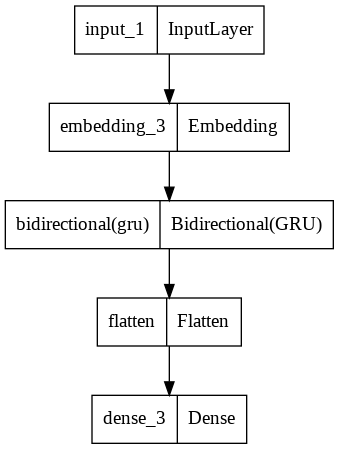

In [ ]:
inputs = tf.keras.Input(shape=(max_len_test,))

embedding = tf.keras.layers.Embedding(
    input_dim = vocab_length,
    output_dim = embedding_dim,
    input_length = max_len_test
)(inputs)

gru = tf.keras.layers.Bidirectional(
    tf.keras.layers.GRU(64, return_sequences=True)
)(embedding)

flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(2, activation='softmax')(flatten)
model = tf.keras.Model(inputs, outputs)

tf.keras.utils.plot_model(model)

In [ ]:
# def scheduler(epoch, lr):
#   if epoch < 2:
#     return lr
#   else:
#     return lr * tf.math.exp(-0.1)


# callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy' ],
)


In [ ]:
history = model.fit(
    X_Train,
    Y_Train,
    validation_split = 0.2,
    batch_size=64,
    epochs = 2,
    # callbacks=[callback]
)

Epoch 1/2
400/400 [==============================] - 264s 654ms/step - loss: 0.4470 - accuracy: 0.8003 - val_loss: 0.2864 - val_accuracy: 0.8794
Epoch 2/2
400/400 [==============================] - 265s 664ms/step - loss: 0.1588 - accuracy: 0.9418 - val_loss: 0.2734 - val_accuracy: 0.8913


In [ ]:
pred_val_gru = np.argmax(model.predict(x_val), axis=1)

157/157 [==============================] - 38s 239ms/step


In [ ]:
print(classification_report(y_val, pred_val_gru))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2486
           1       0.87      0.91      0.89      2514

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [ ]:
predictions_gru = np.argmax(model.predict(x_test), axis=1)


157/157 [==============================] - 36s 229ms/step


In [ ]:
predictions_gru

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
submission_gru = pd.DataFrame({'id':test_data['id'], 'label':predictions_gru})

In [ ]:
submission_gru.to_csv('submission_gru.csv', encoding = 'utf-8-sig', index=False,header = 1)
files.download('submission_gru.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#CNN for text classification


In [ ]:
from sklearn.model_selection import train_test_split
review = final_train_dataset['text'].values
label = final_train_dataset['Label'].values
review_train, review_test, label_train, label_test = train_test_split(review, label, test_size=0.20, random_state=100)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

review_vectorizer = CountVectorizer()
review_vectorizer.fit(review_train)
Xlr_train = review_vectorizer.transform(review_train)
Xlr_test  = review_vectorizer.transform(review_test)
Xlr_train

<32000x78967 sparse matrix of type '<class 'numpy.int64'>'
	with 3342755 stored elements in Compressed Sparse Row format>

###Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(Xlr_train, label_train)
score = LRmodel.score(Xlr_test, label_test)
print("Accuracy:", score)


Accuracy: 0.882125


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# from keras.preprocessing.text import Tokenizer
# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(review_train)
# Xcnn_train = tokenizer.texts_to_sequences(review_train)
# Xcnn_test = tokenizer.texts_to_sequences(review_test)


In [ ]:
test_sequences = tokenizer.texts_to_sequences(text_test)

In [ ]:
train_sequences = tokenizer.texts_to_sequences(text_train)

In [ ]:
val_sequences = tokenizer.texts_to_sequences(text_val)

In [ ]:
from keras_preprocessing.sequence import pad_sequences
Xcnn_train = pad_sequences(train_sequences, padding='post', maxlen=max_len)
Xcnn_val = pad_sequences(val_sequences, padding='post', maxlen=max_len)
Xcnn_test = pad_sequences(test_sequences, padding='post', maxlen=max_len)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing import sequence

In [ ]:
model = Sequential()
model.add(Embedding(vocab_length, 32, input_length=max_len))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10265, 32)         2953152   
                                                                 
 conv1d (Conv1D)             (None, 10265, 32)         3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5132, 32)         0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 164224)            0         
                                                                 
 dense_4 (Dense)             (None, 250)               41056250  
                                                                 
 dense_5 (Dense)             (None, 2)                 502       
                                                      

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(Xcnn_train, y_train, test_size=0.2, random_state=42 ,stratify=y_train)


In [ ]:
# Fitting the data onto model
model.fit(X_Train, Y_Train, validation_data=(X_Test, Y_Test), epochs=10, batch_size=64, verbose=2)


Epoch 1/2
500/500 - 25s - loss: 0.6983 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.5005 - 25s/epoch - 50ms/step
Epoch 2/2
500/500 - 21s - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5005 - 21s/epoch - 42ms/step


In [ ]:
from keras.utils import to_categorical
y_val = to_categorical(y_val,2)


In [ ]:
# Getting score metrics from our model
scores = model.evaluate(Xcnn_val, y_val, verbose=0)
# Displays the accuracy of correct sentiment prediction over test data
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 49.72%
